Tyler Becker

In [1]:
using LinearAlgebra
using Plots
using HW3
using BenchmarkTools
using LaTeXStrings
using Test

[ Info: Precompiling HW3 [0a222e0f-a5c6-42f3-ab98-57faab29f078]


# 1

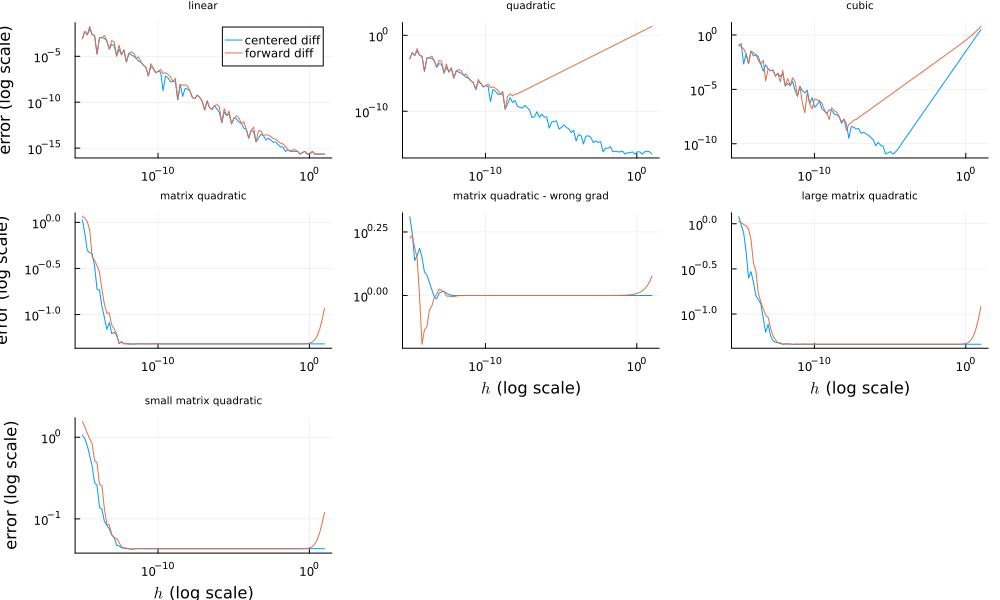

In [2]:
h_vec = 10 .^ (range(-15,stop=1,length=100))

# 1d linear
f_lin(x) = 2x + 1
∇f_lin(x) = 2

# 1d quadratic
f_quad(x) = 3x^2 + 2x + 1
∇f_quad(x) = 6x + 2

# 1d cubic
f_cube(x) = 4x^3 + 3x^2 + 2x + 1
∇f_cube(x) = 12x^2 + 6x + 2


const A_test = rand(100,100)
const A_test_small = rand(100,100)*1e-10
const A_test_large = rand(100,100)*1e10

f_mat_quad(x) = dot(x, A_test, x)
∇f_mat_quad(x) = 2A_test*x

f_mat_quad_small(x) = dot(x, A_test_small, x)
∇f_mat_quad_small(x) = 2A_test_small*x

f_mat_quad_large(x) = dot(x, A_test_large, x)
∇f_mat_quad_large(x) = 2A_test_large*x

∇f_mat_quad_wrong(x) = A_test*x

default_kwargs = (;xscale = :log10, yscale=:log10, titlefontsize=7)

p1 = plot(
    h_vec, 
    centered_diff_grad_error(f_lin, ∇f_lin, 0, h_vec) .+ eps(); 
    default_kwargs..., 
    label="centered diff", title="linear",
    ylabel = "error (log scale)"
)
plot!(
    h_vec, 
    forward_diff_grad_error(f_lin, ∇f_lin, 0, h_vec) .+ eps(), 
    label="forward diff"
)
p2 = plot(
    h_vec, 
    centered_diff_grad_error(f_quad, ∇f_quad, 0, h_vec) .+ eps(); 
    default_kwargs..., label="", title="quadratic")
plot!(
    h_vec,
    forward_diff_grad_error(f_quad, ∇f_quad, 0, h_vec) .+ eps(); label="")

p3 = plot(
    h_vec, 
    centered_diff_grad_error(f_cube, ∇f_cube, 3, h_vec); 
    default_kwargs..., label="",title="cubic"
)
plot!(
    h_vec, 
    forward_diff_grad_error(f_cube, ∇f_cube, 3, h_vec); 
    label=""
)

x_test = rand(size(A_test, 1))
    
p4 = plot(
    h_vec, 
    centered_diff_grad_error(f_mat_quad, ∇f_mat_quad, x_test, h_vec); 
    default_kwargs..., label="", title="matrix quadratic",
    ylabel = "error (log scale)"
)
plot!(
    h_vec, 
    forward_diff_grad_error(f_mat_quad, ∇f_mat_quad, x_test, h_vec); label=""
)

p5 = plot(
    h_vec, 
    centered_diff_grad_error(f_mat_quad, ∇f_mat_quad_wrong, x_test, h_vec); 
    default_kwargs...,label="", title="matrix quadratic - wrong grad",
    xlabel = L"h"*" (log scale)"
)
plot!(
    h_vec, 
    forward_diff_grad_error(f_mat_quad, ∇f_mat_quad_wrong, x_test, h_vec); label=""
)

p6 = plot(
    h_vec, 
    centered_diff_grad_error(f_mat_quad_large, ∇f_mat_quad_large, x_test, h_vec); 
    default_kwargs..., label="",title="large matrix quadratic",
    xlabel = L"h"*" (log scale)"
)
plot!(
    h_vec, 
    forward_diff_grad_error(f_mat_quad_large, ∇f_mat_quad_large, x_test, h_vec); label=""
)

p7 = plot(
    h_vec, 
    centered_diff_grad_error(f_mat_quad_small, ∇f_mat_quad_small, x_test, h_vec); 
    default_kwargs..., label="",title="small matrix quadratic",
    xlabel = L"h"*" (log scale)", ylabel = "error (log scale)"
)
plot!(
    h_vec, 
    forward_diff_grad_error(f_mat_quad_small, ∇f_mat_quad_small, x_test, h_vec); label=""
)

plot(p1, p2, p3, p4, p5, p6, p7, size=(1000, 600))

Given these test examples, we can reasonably reliably distinguish between correct and incorrect gradients. Normalized finite difference errors for true gradients follow a "u" or "v" shaped with a error that's less than `0.1`. The incorrect matrix quadratic gradient clearly fails this heuristic correctness test.

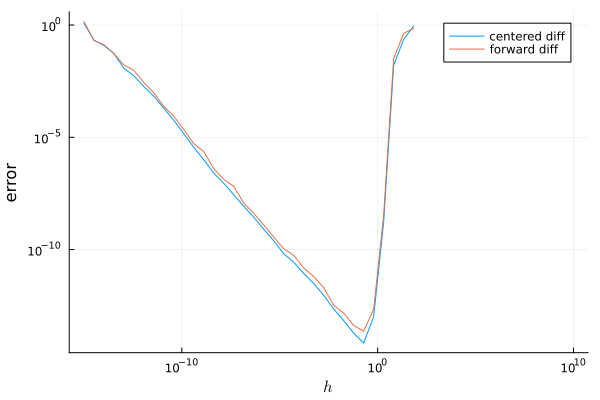

In [14]:
mat = get_spam_data()
X_train, Y_train, X_test, Y_test = train_test_split(mat, 0.334)
w = rand(size(X_train, 1))

f = LogRegProblem(X_test,Y_test)
∇f(w) = HW3.∇(f, w)

plot(
    h_vec,
    centered_diff_grad_error(f, ∇f, w, h_vec),
    xscale=:log10, yscale=:log10, label="centered diff",
    xlabel = L"h", ylabel = "error"
)
plot!(
    h_vec,
    forward_diff_grad_error(f, ∇f, w, h_vec),
    label="forward diff"
)

# 2

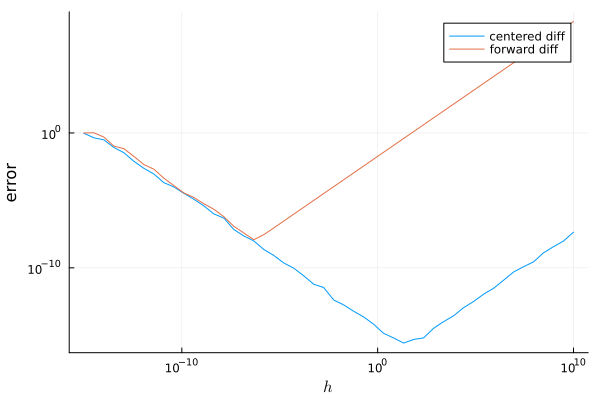

In [16]:
struct LLSProblem
    A::Matrix{Float64}
    b::Vector{Float64}
    cache::Vector{Float64}
    LLSProblem(A,b) = new(A,b,similar(b))
end

(f::LLSProblem)(x) = 0.5*norm(f.A*x - f.b,2)^2
function ∇(f::LLSProblem, x)
    (;A,b) = f
    return A' * (A*x - b)
end

h_vec = 10 .^ (range(-15,stop=10,length=50))

n,m = 10,100
A = rand(m, n)
b = rand(m)

f = LLSProblem(A,b)
∇f(x) = ∇(f,x)

x = randn(n)*10

plot(
    h_vec, 
    centered_diff_grad_error(f, ∇f, x, h_vec), 
    xscale=:log10, yscale=:log10, label="centered diff",
    xlabel = L"h", ylabel = "error"
)
plot!(
    h_vec, 
    forward_diff_grad_error(f, ∇f, x, h_vec), 
    xscale=:log10, yscale=:log10, label="forward diff"
)

Test Passed

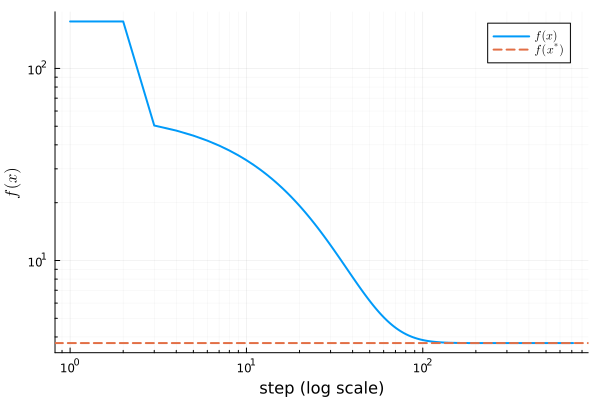

In [18]:
prob = DifferentiableProblem(f, ∇f)
sol = GradientDescentSolver(α=inv(opnorm(A)^2),ϵ=1e-15)

x0 = randn(n)
x_opt,hist = solve(sol, prob, x0)
true_x_opt = pinv(A)*b

# test passes - the x we found is approximately equal to the true optimal x
show(@test true_x_opt ≈ x_opt atol=1e-6) 

p = plot(hist.f, yscale=:log10, xscale=:log10, label=L"f(x)", xlabel="step (log scale)", ylabel=L"f(x)", minorticks=9, minorgrid=true, lw=2)
Plots.abline!(p, 0.0, f(true_x_opt), label=L"f(x^{*})", ls=:dash, lw=2)

# 3 

Test Passed

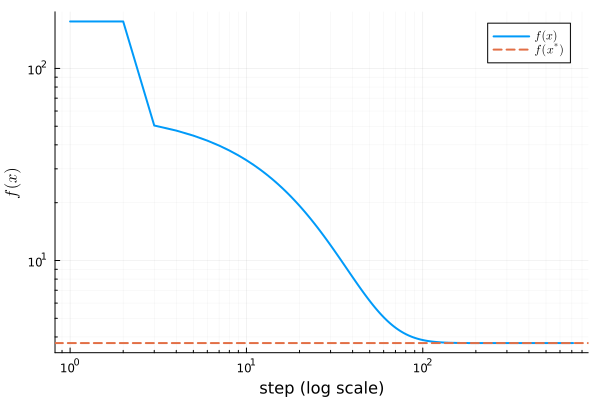

In [19]:
sol = GradientDescentSolver(
    α = inv(opnorm(A)^2),
    ϵ = 1e-15,
    linesearch = BackTrackingLineSearch()
)
x_opt,hist = solve(sol, prob, x0)

# test passes - the x we found is approximately equal to the true optimal x
show(@test true_x_opt ≈ x_opt atol=1e-6)

p = plot(hist.f, yscale=:log10, xscale=:log10, label=L"f(x)", xlabel="step (log scale)", ylabel=L"f(x)", minorticks=9, minorgrid=true, lw=2)
Plots.abline!(p, 0.0, f(true_x_opt), label=L"f(x^{*})", ls=:dash, lw=2)

The solutions found with and without backtracking linesearch give approximately the true optimal decision variable $x^*$.

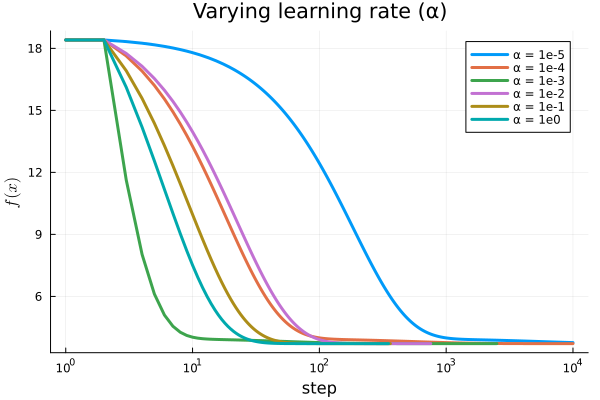

In [20]:
αs = 10 .^ collect(-5.:0.)
hist_v = HW3.SolverHistory[]
for α ∈ αs
    sol = GradientDescentSolver(
        ; α,
        max_iter = 10_000,
        ϵ = 1e-15,
        linesearch = BackTrackingLineSearch()
    )
    x_opt, hist = solve(sol, prob, zeros(n))
    push!(hist_v, hist)
end

plot(
    getfield.(hist_v, :f);
    xscale=:log10,
    labels = reshape(["α = 1e$x" for x ∈ -5:0], 1, length(αs)),
    title = "Varying learning rate (α)",
    xlabel = "step",
    ylabel = L"f(x)",
    lw = 3
)

In varying the learning rate (initial step size), we find that `1e-5` or `1e-4` converge rather slowly whereas the higher learning rates expectedly converge more quickly. An issue that normally would arise with higher learning rates is an increase in objective function value. But, because we're using a backtracking linesearch this does not happen and loss monotonically decreases.

# 4

## a

In [ ]:
mat = get_spam_data()
X_train, Y_train, X_test, Y_test = train_test_split(mat, 0.334)

w0 = rand(size(X_train, 1))

f = LogRegProblem(X_train,Y_train)
∇f(x) = HW3.∇(f,x)

@btime f($w0);
@btime ∇f($w0);

## b

In [29]:
prob = DifferentiableProblem(f, ∇f)
solver = GradientDescentSolver(
    α = 1e-6,
    ϵ = 1e-4,
    linesearch = BackTrackingLineSearch(),
)
w0 = zeros(size(X_test, 1))
w_opt, hist = solve(solver, prob, w0)
plot(hist.f, xscale=:log10, label="", xlabel="Optimization Step (log scale)", ylabel=L"f(x)")

## c

In [30]:
train_acc = map(hist.x) do x
    HW3.accuracy(x, X_train, Y_train)
end

test_acc = map(hist.x) do x
    HW3.accuracy(x, X_test, Y_test)
end

plot(train_acc, xscale=:log10, label="train", ylabel="Accuracy", xlabel="Optimization Step (log scale)")
plot!(test_acc, label="test")

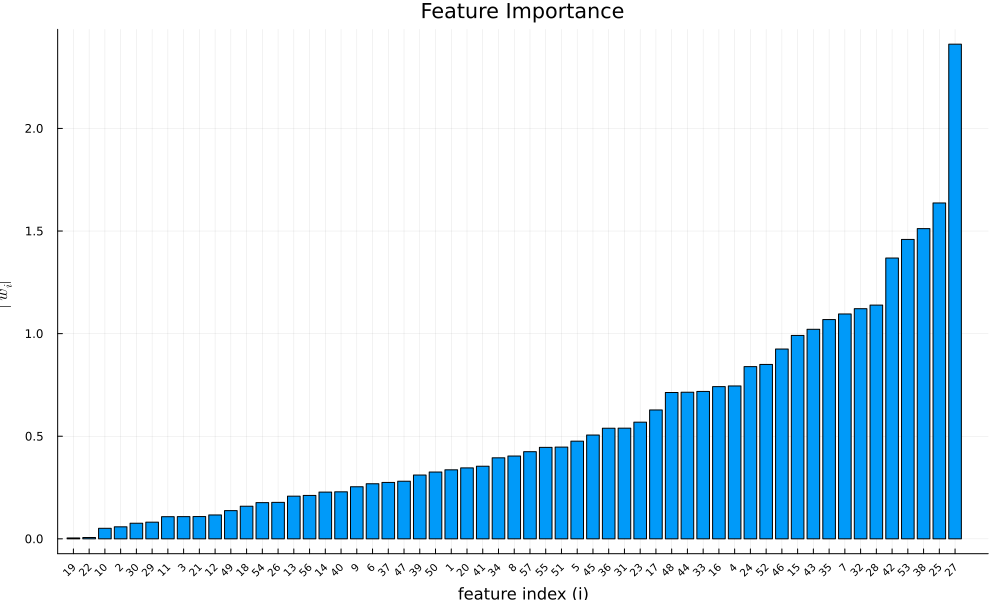

In [24]:
perms = sortperm(abs.(w_opt))

bar(
    abs.(w_opt[perms]), label="",
    xticks=(eachindex(perms),perms),
    xrotation=45, xtickfont=(7), xlims=(0,Inf),
    xlabel = "feature index (i)",
    ylabel = L"|w_i|",
    minorgrid = false,
    title = "Feature Importance",
    size = (1000,600)
)

In [26]:
last(test_acc), last(train_acc)

(0.93359375, 0.9507340946166395)

From the test/train accuracy curves we find that we are overfitting only slightly. Nonetheless, we acheive a testing accuracy of `93%` and a training accuracy of `95%`. While not occuring every time (depenedent on the random seed in the train-test split), we find that while the loss function smoothly decreases, the train/test accuracy does not always increase smoothly. Because our objective function is not directly accuracy, this is not impossible, rather just somewhat surprising. Of course, after the initial jagged nature of the accuracy in training, the curve eventually smoothes to somewhat of an equilibrium close to the reported accuracies.